In [65]:
import os
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score
import joblib
import pandas as pd
import numpy as np

# 回归算法
## 线性回归

In [66]:
"""
线性回归直接预测房子价格
:return: None
"""
# 加利福尼亚房价数据集
fe_cal = fetch_california_housing(data_home='G:\\wangdao_python_short_class\\python_ml\\data')

print("获取特征值")
print(fe_cal.data.shape)
print('-' * 50)
print(fe_cal.data[0])
print("目标值")
print(fe_cal.target)  #单位是10万美金
# print(fe_cal.DESCR)
print('-' * 50)
print(fe_cal.feature_names)  #特征列的名字

获取特征值
(20640, 8)
--------------------------------------------------
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
目标值
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
--------------------------------------------------
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [67]:
fe_cal.target.shape

(20640,)

In [68]:
# 分割数据集到训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(fe_cal.data, fe_cal.target, test_size=0.25, random_state=1)

print(x_train.shape)

# 特征值和目标值是都必须进行标准化处理, 实例化两个标准化API
std_x = StandardScaler()

x_train = std_x.fit_transform(x_train)  #训练集标准化
x_test = std_x.transform(x_test)  #测试集标准化

print(y_train.shape)
# 目标值进行了标准化，暂时没有对目标值进行标准化处理
std_y = StandardScaler()

# 标签进行标准化
# 目标值是一维的，这里需要传进去2维的
# y_train = std_y.fit_transform(y_train.reshape(-1, 1)) # -1表示不指定行数，1表示指定列数
# print(y_train.shape)

# y_test = std_y.transform(y_test.reshape(-1, 1)) # y_test不需要标准化, 因为x_test已经标准化过了,输出y_test时只需要inverse_transform即可
# print(y_test.shape)

(15480, 8)
(15480,)


### 未对目标值进行标准化处理的训练代码

In [69]:
import os

# estimator预测
# 正规方程求解方式预测结果，正规方程进行线性回归
lr = LinearRegression()

# fit是耗时的
lr.fit(x_train, y_train)

# 回归系数可以看特征与目标之间的相关性
print('回归系数', lr.coef_)

# 预测值
y_predict = lr.predict(x_test)

# 保存训练好的模型，模型中保存的是w的值，也保存了模型结构
# 保存模型放在fit之后即可
os.unlink('./tmp/test.pkl')  # 删除之前的模型文件
joblib.dump(lr, "./tmp/test.pkl")
print("正规方程测试集里面每个房子的预测价格：", y_predict[0:10])

#下面是求测试集的损失，用均方误差，公式是(y_test-y_predict)^2/n
print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))

回归系数 [ 0.83167028  0.12159502 -0.26758589  0.30983997 -0.00518054 -0.04040421
 -0.90736902 -0.88212727]
正规方程测试集里面每个房子的预测价格： [2.12391852 0.93825754 2.7088455  1.70873764 2.82954754 3.50376456
 3.0147162  1.62781292 1.74317518 2.01897806]
正规方程的均方误差： 0.5356532845422556


### 对目标值进行标准化处理的训练代码

In [70]:
# lr = LinearRegression()
# # fit是耗时的
# lr.fit(x_train, y_train)
# 
# # 回归系数可以看特征与目标之间的相关性
# print('回归系数', lr.coef_)
# 
# y_predict = lr.predict(x_test)  # 预测值
# 
# # 保存训练好的模型，模型中保存的是w的值，也保存了模型结构
# # 预测测试集的房子价格，通过inverse得到真正的房子价格
# y_lr_predict = std_y.inverse_transform(y_predict)
# 
# #保存模型放在fit之后即可
# os.unlink('./tmp/test.pkl')  # 删除之前的模型文件
# joblib.dump(lr, "./tmp/test.pkl")
# print("正规方程测试集里面每个房子的预测价格：", y_lr_predict[0:10])
# print("正规方程的均方误差：", mean_squared_error(y_test, y_lr_predict))

### 加载保存的模型

In [71]:
#模拟上线时加载模型
model = joblib.load("./tmp/test.pkl")
# # 因为目标值进行了标准化，一定要把预测后的值逆向转换回来
y_predict = model.predict(x_test)

# print("保存的模型预测的结果：", y_predict[0:10])
# print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))
print("保存的y标准化后的模型预测的结果：", std_y.inverse_transform(y_predict)[0:10])
print("正规方程inverse后的均方误差：", mean_squared_error(y_test, std_y.inverse_transform(y_predict)))

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred))
#人工求均方误差
print((np.square(3 - 2.5) + np.square(0.5) + 1) / 4)

### 线性回归——梯度下降进行房价预测

In [72]:
# 梯度下降去进行房价预测,数据量大要用这个
# learning_rate的不同方式，代表学习率变化的算法不一样,比如constant,invscaling,adaptive
# 默认可以去调 eta0 = 0.008，会改变learning_rate的初始值
# learning_rate='optimal',alpha是正则化力度，但是会影响学习率的值，由alpha来算学习率
# penalty代表正则化，分为l1和l2
# eta0=0.01, penalty='l2',max_iter=1000
sgd = SGDRegressor(eta0=0.01, penalty='l2', max_iter=1000)

# 训练
sgd.fit(x_train, y_train)

print('梯度下降的回归系数', sgd.coef_)

# 预测测试集的房子价格
# y_sgd_predict = std_y.inverse_transform(sgd.predict(x_test).reshape(-1, 1))
y_predict = sgd.predict(x_test)
# print("梯度下降测试集里面每个房子的预测价格：", y_sgd_predict)
print("梯度下降的均方误差：", mean_squared_error(y_test, y_predict))
# print("梯度下降的原始房价量纲均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_sgd_predict))

梯度下降的回归系数 [ 0.81734007  0.08205921 -0.18716923  0.35843099 -0.01811783 -0.03743787
 -0.88172522 -0.84981291]
梯度下降的均方误差： 0.5457861309468977


In [73]:
# 梯度下降模拟
w = 1
alpha = 0.1


def loss(w):
    return 2 * w ** 2 + 3 * w + 2


def dao_shu(w):
    return 4 * w + 3


for i in range(30):
    w = w - alpha * dao_shu(w)
    print(f'w {w} 损失{loss(w)}')

w 0.29999999999999993 损失3.0799999999999996
w -0.12 损失1.6688
w -0.372 损失1.160768
w -0.5232 损失0.9778764800000002
w -0.61392 损失0.9120355328
w -0.6683520000000001 损失0.888332791808
w -0.7010112000000001 损失0.87979980505088
w -0.72060672 损失0.8767279298183168
w -0.732364032 损失0.8756220547345941
w -0.7394184192 损失0.8752239397044537
w -0.74365105152 损失0.8750806182936035
w -0.746190630912 损失0.8750290225856971
w -0.7477143785472 损失0.8750104481308509
w -0.74862862712832 损失0.8750037613271064
w -0.749177176276992 损失0.8750013540777584
w -0.7495063057661951 损失0.8750004874679931
w -0.7497037834597171 损失0.8750001754884773
w -0.7498222700758302 损失0.8750000631758519
w -0.7498933620454982 损失0.8750000227433066
w -0.7499360172272989 损失0.8750000081875902
w -0.7499616103363793 损失0.8750000029475327
w -0.7499769662018276 损失0.8750000010611116
w -0.7499861797210966 损失0.8750000003820002
w -0.749991707832658 损失0.87500000013752
w -0.7499950246995948 损失0.8750000000495071
w -0.7499970148197569 损失0.8750000000178226
w -0.

## 岭回归

In [74]:
# 岭回归去进行房价预测
# 岭回归是对线性回归加入L2正则化，L2正则化是对系数的平方和进行惩罚
# alpha就是补偿的系数
# 正规方程求解，加补偿就可以让正规方程可逆
rd = Ridge(alpha=0.02)

rd.fit(x_train, y_train)

print(rd.coef_)

# 预测测试集的房子价格
print(rd.predict(x_test).shape)
# y_rd_predict = std_y.inverse_transform(rd.predict(x_test))
y_predict = rd.predict(x_test)
# print("岭回归里面每个房子的预测价格：", y_rd_predict)

print("岭回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("岭回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_rd_predict))

[ 0.83166963  0.12159681 -0.26758236  0.30983534 -0.00517992 -0.04040432
 -0.90735215 -0.88211025]
(5160,)
岭回归的均方误差： 0.5356531179270398


## Lasso回归

In [75]:
# Lasso回归去进行房价预测
# Lasso回归是对线性回归加入L1正则化
# alpha就是补偿的系数
print(x_train.shape)
print(y_train.shape)
ls = Lasso(alpha=0.001)

ls.fit(x_train, y_train)

print(ls.coef_)

# 预测测试集的房子价格
print(ls.predict(x_test).shape)
print('-' * 50)
# y_ls_predict = std_y.inverse_transform(ls.predict(x_test).reshape(-1,1))
y_predict = ls.predict(x_test)
# print("Lasso回归里面每个房子的预测价格：", y_rd_predict)

print("Lasso回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("Lasso回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_ls_predict))

(15480, 8)
(15480,)
[ 0.82655827  0.1225482  -0.25369194  0.29596304 -0.00381001 -0.03948424
 -0.89646842 -0.87060253]
(5160,)
--------------------------------------------------
Lasso回归的均方误差： 0.5356324125105497


## 逻辑回归

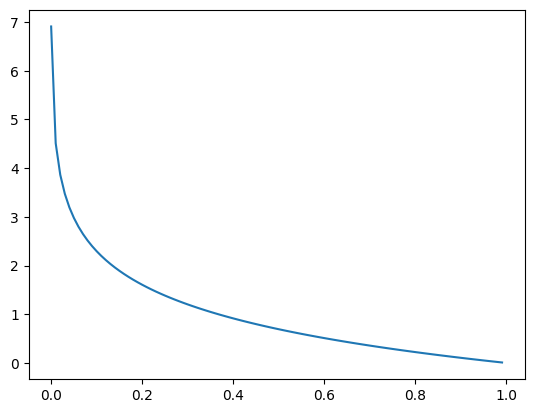

In [76]:
x = np.arange(0.001, 1, 0.01)  #0-1之间，步长0.01
import matplotlib.pyplot as plt

plt.plot(x, -np.log(x))  #以e为底部
plt.show()  # x越接近1时，对数似然损失越小

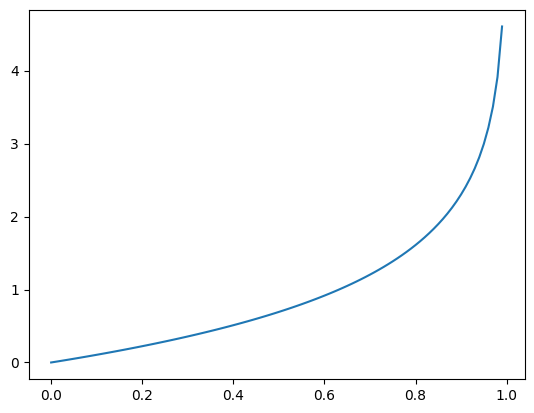

In [77]:
x = np.arange(0, 1, 0.01)
import matplotlib.pyplot as plt

plt.plot(x, -np.log(1 - x))
plt.show()  # x越接近1时，对数似然损失越大

In [78]:
"""
逻辑回归做二分类进行癌症预测（根据细胞的属性特征）
:return: NOne
"""
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 读取数据
# data = pd.read_csv(
#     "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#     names=column)
data = pd.read_csv("G:/wangdao_python_short_class/python_ml/data/breast-cancer-wisconsin.csv", names=column)
# print(data) #想看可以解除
#当你读取数据时，看上去是数值的列，读进来是字符串，说明里边
# 存在了非数值情况
print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
        Sample code number  Clump Thickness  Uniformity of Cell Size  \
count         6.990000e+0

In [79]:
data['Bare Nuclei'].unique() #因为上面发现它是object类型

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [80]:
# 缺失值进行处理
data = data.replace(to_replace='?', value=np.nan)
#直接删除，哪一行有空值，就删除对应的样本
data = data.dropna()
print('-' * 50)
print(data.shape)

--------------------------------------------------
(683, 11)


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [82]:
#分类的类别是2和4,对应 "良性", "恶性"
data[column[10]].unique()

array([2, 4])

In [83]:
#把第6列的字符串转化为数字类型
data[column[6]] = data[column[6]].astype('int16')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int16
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int16(1), int64(10)
memory usage: 60.0 KB


In [85]:
# 进行数据的分割,第零列是编号，不可以作为特征，把第1-9列作为特征，第10列作为标签
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]], data[column[10]], test_size=0.25,random_state=1)

# 进行标准化处理
std = StandardScaler()

x_train = std.fit_transform(x_train) #训练集标准化
x_test = std.transform(x_test) #测试集标准化
x_train[0]

array([-1.21629973, -0.70863282, -0.75174943,  0.04301674, -0.55657068,
       -0.71054972, -0.99312055, -0.62911518, -0.36280962])

In [86]:
#
# # 逻辑回归预测
# C正则化力度
# solver = 'liblinear'  solver是学习率优化算法，就是学习率会随着epoch的变化而变化
#epoch就代表第几次迭代
#max_iter 最大迭代次数
lg = LogisticRegression(C=0.5, solver='lbfgs')
#
lg.fit(x_train, y_train)
# 逻辑回归的权重参数，了解，没那么重要
print(lg.coef_)

y_predict = lg.predict(x_test)
print(y_predict) #预测的标签
print("准确率：", lg.score(x_test, y_test))
print(y_test[0:5])
print('-'*50)
print(lg.predict_proba(x_test)[0:5])  #得出对应分类的概率

[[1.11400191 0.25293086 0.78938469 0.60986034 0.0728013  1.10834397
  0.7794668  0.64312128 0.67692658]]
[2 2 2 4 2 4 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 4 4 2 4 2
 2 4 4 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 4 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 4 2 4
 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 2 2 2 4
 2 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 4 4 2 4 2 2 2]
准确率： 0.9824561403508771
444    2
24     2
195    2
49     4
375    2
Name: Class, dtype: int64
--------------------------------------------------
[[0.94893919 0.05106081]
 [0.99494175 0.00505825]
 [0.98365149 0.01634851]
 [0.02707911 0.97292089]
 [0.99732446 0.00267554]]


In [87]:
# 为什么还要看下召回率，labels和target_names对应
# macro avg 平均值  weighted avg 加权平均值
print(classification_report(y_test, y_predict, labels=[2, 4], target_names=["良性", "恶性"]))
#AUC计算要求是二分类，不需要是0和1
print("AUC指标：", roc_auc_score(y_test, y_predict))

              precision    recall  f1-score   support

          良性       0.97      1.00      0.99       111
          恶性       1.00      0.95      0.97        60

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC指标： 0.975


In [88]:
print(x_train.shape)
print(x_test.shape)

(512, 9)
(171, 9)


In [89]:
print(-np.log(0.1))

2.3025850929940455


In [91]:
print(-np.log(0.9))

0.10536051565782628
